<a href="https://colab.research.google.com/github/tskmr/MIP/blob/main/lec12(2025_7_7)_%E9%80%86%E3%82%B5%E3%83%B3%E3%83%97%E3%83%AA%E3%83%B3%E3%82%B0%E3%81%A8%E3%83%AF%E3%82%A4%E3%83%96%E3%83%AB%E6%8E%A8%E5%AE%9A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
library(tidyverse)

set.seed(12345)
n = 200
mu = 10
sigma = 0.25

eta = exp(mu)
set.seed(1234)
u = runif(n)
# t.org = sort(rweibull(n, shape = 1/sigma, scale = eta))
t.org = sort(eta * (- log(1-u))^(sigma))

tau = 20000
t = ifelse(t.org>tau, tau, t.org)
t

[1]  6884.062  7555.631  7674.224  8526.745  8935.279  9601.153  9813.952
  [8]  9900.499 10016.143 10247.646 10569.910 11434.563 11545.828 11589.467
 [15] 11682.472 11918.679 12024.467 12204.953 12574.527 12721.039 12982.995
 [22] 13056.272 13213.758 13223.550 13271.249 13383.872 13407.349 13454.547
 [29] 13500.234 13558.446 13567.686 13795.338 14060.693 14112.035 14209.974
 [36] 14233.892 14386.633 14579.427 14726.093 14851.528 15057.216 15165.192
 [43] 15227.204 15526.924 15544.152 15647.652 15721.688 15792.561 15798.875
 [50] 15839.814 15923.825 16017.207 16160.279 16294.585 16410.863 16440.425
 [57] 16660.660 16680.086 16723.609 16736.335 16784.635 16890.313 17025.486
 [64] 17067.904 17073.477 17101.439 17159.202 17185.309 17185.967 17192.810
 [71] 17205.837 17221.811 17301.692 17311.160 17332.134 17368.538 17430.237
 [78] 17444.904 17451.533 17518.477 17741.925 17762.100 17955.592 18247.003
 [85] 18380.915 18461.265 18968.562 18983.250 19027.203 19063.971 19087.368
 [92] 19109.533 19154.426 19206.459 19457.836 19629.274 19689.424 19789.942
 [99] 19827.399 19880.016 19896.653 20000.000 20000.000 20000.000 20000.000
[106] 20000.000 20000.000 20000.000 20000.000 20000.000 20000.000 20000.000
[113] 20000.000 20000.000 20000.000 20000.000 20000.000 20000.000 20000.000
[120] 20000.000 20000.000 20000.000 20000.000 20000.000 20000.000 20000.000
[127] 20000.000 20000.000 20000.000 20000.000 20000.000 20000.000 20000.000
[134] 20000.000 20000.000 20000.000 20000.000 20000.000 20000.000 20000.000
[141] 20000.000 20000.000 20000.000 20000.000 20000.000 20000.000 20000.000
[148] 20000.000 20000.000 20000.000 20000.000 20000.000 20000.000 20000.000
[155] 20000.000 20000.000 20000.000 20000.000 20000.000 20000.000 20000.000
[162] 20000.000 20000.000 20000.000 20000.000 20000.000 20000.000 20000.000
[169] 20000.000 20000.000 20000.000 20000.000 20000.000 20000.000 20000.000
[176] 20000.000 20000.000 20000.000 20000.000 20000.000 20000.000 20000.000
[183] 20000.000 20000.000 20000.000 20000.000 20000.000 20000.000 20000.000
[190] 20000.000 20000.000 20000.000 20000.000 20000.000 20000.000 20000.000
[197] 20000.000 20000.000 20000.000 20000.000

In [30]:
dj = ifelse(t.org>tau, 0, 1)
rj = 1-dj

d = data.frame(t=t, dj=dj, rj=rj)
d
# write.csv(d, "data.csv")

n = length(d$t)

t,dj,rj
<dbl>,<dbl>,<dbl>
6884.062,1,0
7555.631,1,0
7674.224,1,0
8526.745,1,0
8935.279,1,0
9601.153,1,0
9813.952,1,0
9900.499,1,0
10016.143,1,0


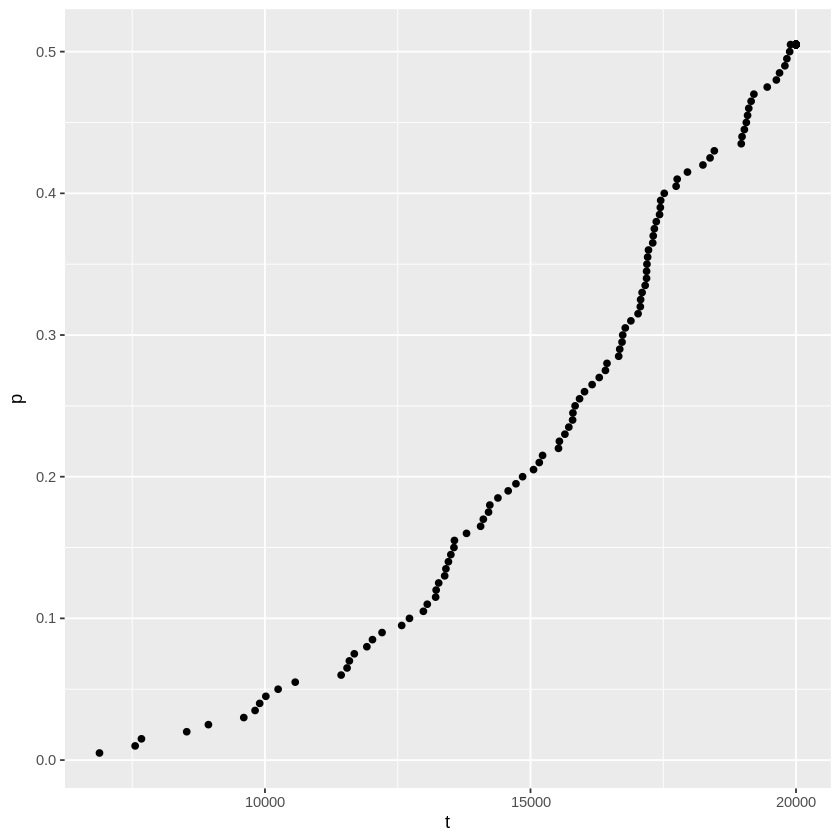

In [31]:
kaplan.meier = function(t, dj){
  nj = rev(seq_along(t))
  p = dj/nj
  q = 1 - p
  CDF = 1- cumprod(q)
  CDF
}
d = d %>% mutate(p = kaplan.meier(t, dj)) %>% data.frame
d %>% ggplot() + geom_point(aes(t, p))
# ggsave("1-a.pdf", w=6, h=4)


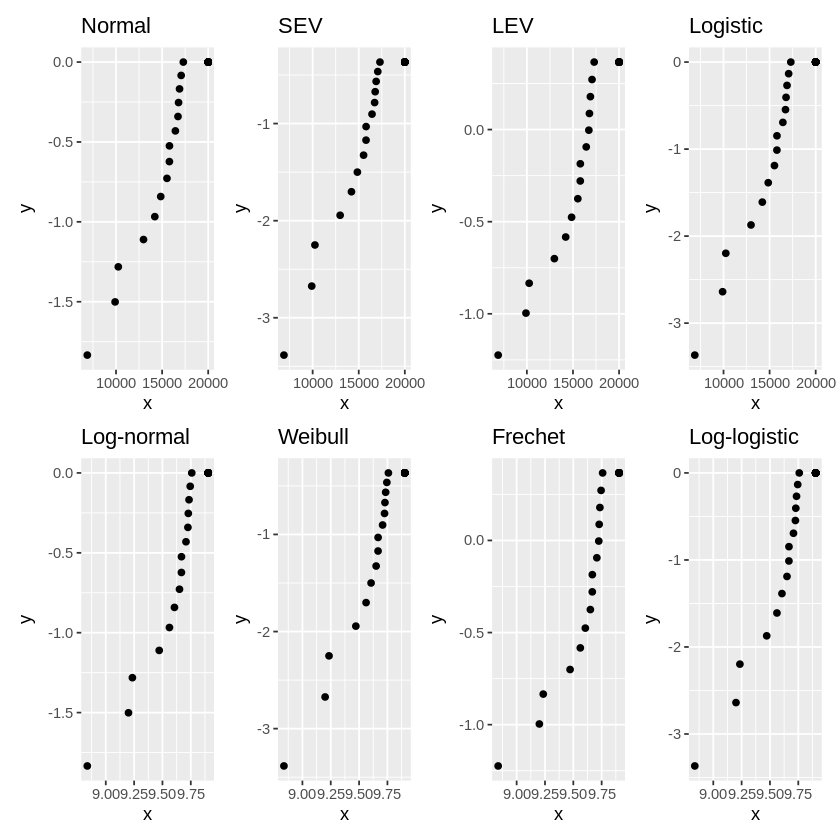

In [28]:
t = d$t
p = d$p

PhiInv_norm = function(p){ qnorm(p) }
PhiInv_sev = function(p){ log(-log(1-p)) }
PhiInv_lev = function(p){ -log(-log(p)) }
PhiInv_logis = function(p){ log(p/(1-p)) }

pN = data.frame(x = t, y = PhiInv_norm(p)) %>%
  ggplot() + geom_point(aes(x, y)) + ggtitle("Normal")
pS = data.frame(x = t, y = PhiInv_sev(p)) %>%
  ggplot() + geom_point(aes(x, y)) + ggtitle("SEV")
pL = data.frame(x = t, y = PhiInv_lev(p)) %>%
  ggplot() + geom_point(aes(x, y)) + ggtitle("LEV")
pLogis = data.frame(x = t, y = PhiInv_logis(p)) %>%
  ggplot() + geom_point(aes(x, y)) + ggtitle("Logistic")

pLN = data.frame(x = log(t), y = PhiInv_norm(p)) %>%
  ggplot() + geom_point(aes(x, y)) + ggtitle("Log-normal")
pW = data.frame(x = log(t), y = PhiInv_sev(p)) %>%
  ggplot() + geom_point(aes(x, y)) + ggtitle("Weibull")
pF = data.frame(x = log(t), y = PhiInv_lev(p)) %>%
  ggplot() + geom_point(aes(x, y)) + ggtitle("Frechet")
pLL = data.frame(x = log(t), y = PhiInv_logis(p)) %>%
  ggplot() + geom_point(aes(x, y)) + ggtitle("Log-logistic")

if(!require(patchwork)) install.packages("patchwork")
library(patchwork)
wrap_plots(pN, pS, pL, pLogis, pLN, pW, pF, pLL, ncol=4)
# ggsave("1-b.pdf", w=10, h=4)


In [21]:
dsev = function(z){
  exp(z-exp(z))
}
psev = function(z){
  1-exp(-exp(z))
}
ft = function(t, par){
  mu = par[1]
  sigma = par[2]
  if(sigma<0) return(0)
  1/t/sigma * dsev((log(t) - mu)/sigma)
}
Ft = function(t, par){
  mu = par[1]
  sigma = par[2]
  psev((log(t) - mu)/sigma)
}
l_i = function(t, par, n_d, n_r){
  n_d * log(ft(t, par)) + n_r * log(1-Ft(t, par))
}
loglikelihood = function(t, n_d, n_r){
  function(par){
    sum(l_i(t, par, n_d, n_r))
  }
}

l = loglikelihood(d$t, d$dj, d$rj)
res = optim(c(10, 1), l, control= list(fnscale = -1), hessian = TRUE)
res$par


[1] 9.9955812 0.2862721

In [22]:
Hn = res$hessian # ヘッセ行列の推定値
hat.FI = -Hn # 観測フィッシャー情報行列の推定値
hat.aVar = solve(hat.FI) # 逆行列を求めて，プラグイン漸近分散を得る
diag(hat.aVar)

hat.mu = res$par[1] # muの最尤推定値
z = qnorm(0.975) # 標準正規分布の上側0.025%点
c(hat.mu - z * sqrt(hat.aVar[1,1]),
hat.mu + z * sqrt(hat.aVar[1,1]))

hat.sigma = res$par[2] # muの最尤推定値
z = qnorm(0.975) # 標準正規分布の上側0.025%点
c(hat.sigma - z * sqrt(hat.aVar[2,2]),
hat.sigma + z * sqrt(hat.aVar[2,2]))



[1] 0.006844200 0.004624293

[1]  9.833434 10.157728

[1] 0.1529903 0.4195538

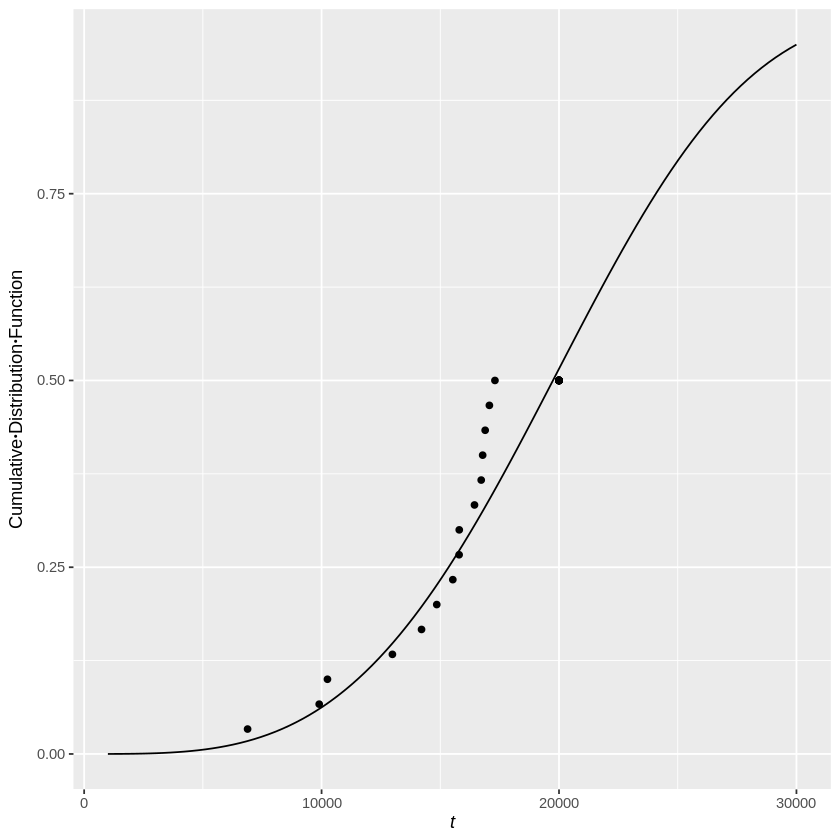

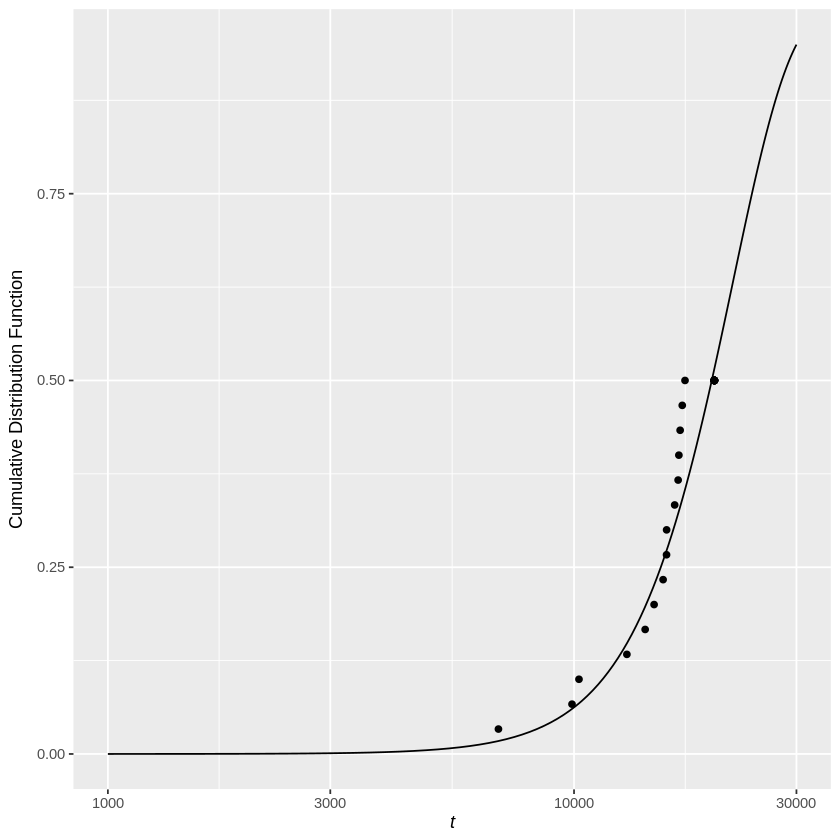

In [23]:
mu = hat.mu
sigma = hat.sigma
aVar = hat.aVar

calc.dFT = function(t){
  hat.F = Ft(t, c(mu, sigma))
  dFT = data.frame(t, mean=hat.F)
  # dFT = dFT %>% mutate(upper = ifelse(upper>1, 1, upper), lower=ifelse(lower<0, 0, lower))
  plot = dFT %>%
    ggplot()+geom_line(aes(t, mean))+
    xlab(bquote(italic(t)))+ylab("Cumulative␣Distribution␣Function")+
    geom_point(data = d, aes(t, p))
  print(plot)
  dFT
}

dFTs = calc.dFT(t = seq(1000, 30000, len=100))

plot = ggplot() +
  xlab(bquote(italic(t)))+ylab("Cumulative Distribution Function")+
  geom_point(data = d, aes(t, p))+
  scale_x_log10()
plot = plot +
  geom_line(data=dFTs, aes(t, mean))
print(plot)
# ggsave("3-a.pdf", w=6, h=4)


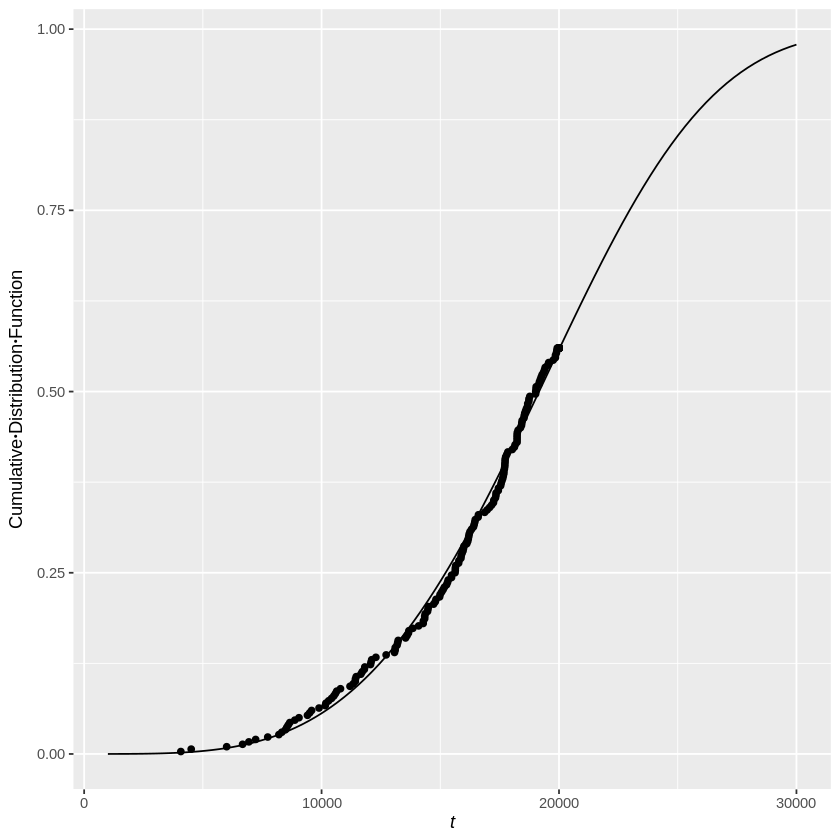

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 17 rows containing missing values or values outside the scale range
(`geom_line()`).”


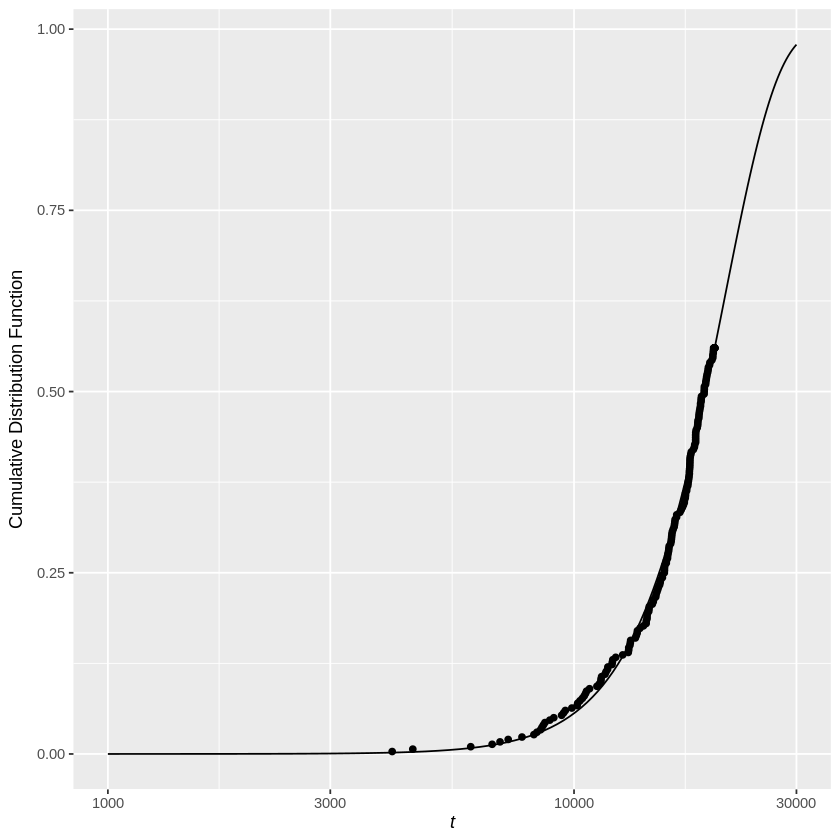

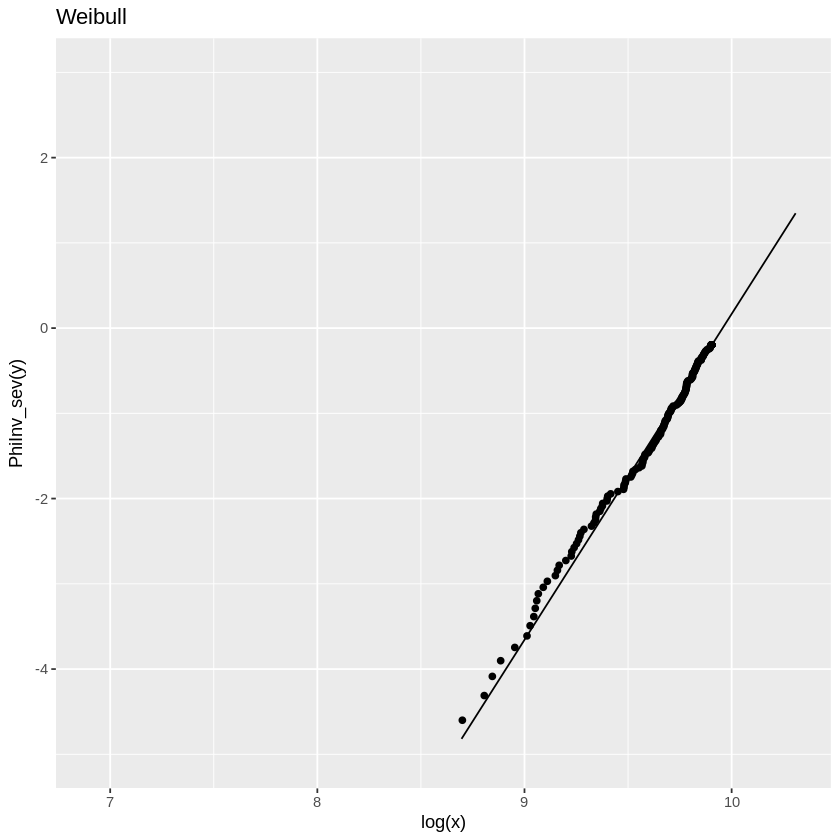

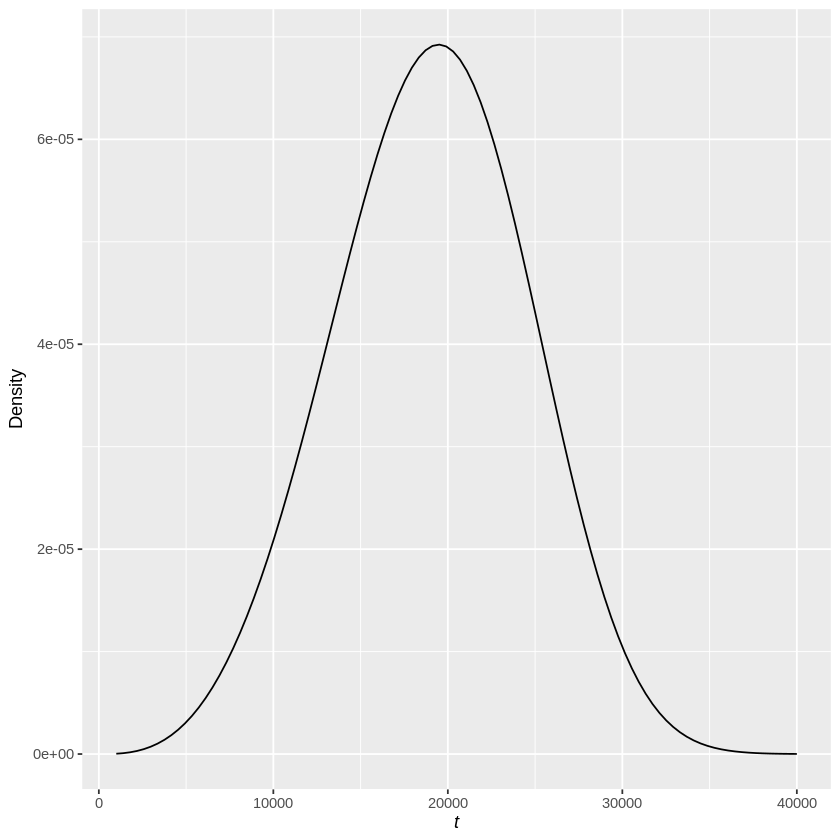

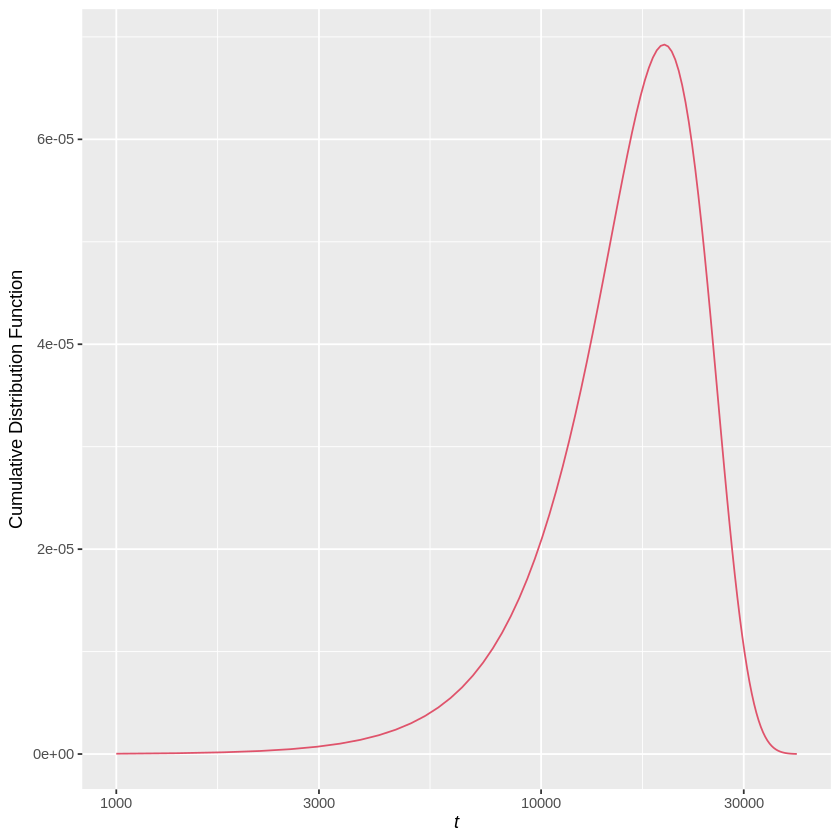

In [12]:



data.frame(x = d$t, y = d$p) %>%
  ggplot() + geom_point(aes(log(x), PhiInv_sev(y))) + ggtitle("Weibull")+
  geom_line(data = dFTs, aes(log(t), PhiInv_sev(mean))) +
  ylim(-5, 3)
# ggsave("3-b.pdf", w=6, h=4)





calc.dft = function(t){
  hat.f = ft(t, c(mu, sigma))
  dft = data.frame(t, mean=hat.f)
  # dFT = dFT %>% mutate(upper = ifelse(upper>1, 1, upper), lower=ifelse(lower<0, 0, lower))
  plot = dft %>%
    ggplot()+geom_line(aes(t, mean))+
    xlab(bquote(italic(t)))+ylab("Density")
  print(plot)
  dft
}

dfts = calc.dft(t = seq(1000, 40000, len=100))

plot = ggplot() +
  xlab(bquote(italic(t)))+ylab("Cumulative Distribution Function")+
  # geom_histogram(data = d, aes(t, ..density..))+
  scale_x_log10()
plot = plot +
    geom_line(data=dfts, aes(t, mean), col=2)
print(plot)
# ggsave("3-a.pdf", w=6, h=4)




#
# Jacobian = function(t, aTemp, beta0, beta1, sigma, h = 0.00001){
#   j1 = (Ft(t, aTemp, c(beta0+h, beta1, sigma)) - Ft(t, aTemp, c(beta0-h, beta1, sigma)))/(2*h)
#   j2 = (Ft(t, aTemp, c(beta0, beta1+h, sigma)) - Ft(t, aTemp, c(beta0, beta1-h, sigma)))/(2*h)
#   j3 = (Ft(t, aTemp, c(beta0, beta1, sigma+h)) - Ft(t, aTemp, c(beta0, beta1, sigma-h)))/(2*h)
#   matrix(c(j1, j2, j3), ncol=3)
# }
#
# calc.dFT = function(t, temp){
#   aTemp = arrhenius(temp)
#   hat.F = Ft(t, aTemp, c(beta0, beta1, sigma))
#   J = Jacobian(t, aTemp, beta0, beta1, sigma)
#   tJ = t(J)
#   var.F = sapply(1:length(t), function(i) J[i,]%*%aVar%*%tJ[,i])
#   var.F
#
#   dFT = data.frame(
#     t, temp= temp,
#     mean=hat.F,
#     upper=hat.F+qnorm(0.975)*sqrt(var.F),
#     lower=hat.F-qnorm(0.975)*sqrt(var.F))
#   dFT = dFT %>% mutate(upper = ifelse(upper>1, 1, upper), lower=ifelse(lower<0, 0, lower))
#   plot = dFT %>%
#     ggplot()+geom_line(aes(t, mean))+
#     geom_line(aes(t, upper), linetype=2)+
#     geom_line(aes(t, lower), linetype=2)+
#     xlab(bquote(italic(t)))+ylab("Cumulative␣Distribution␣Function")+
#     geom_point(data = d, aes(t, p))
#   print(plot)
#   dFT
# }
#
# dFTs = data.frame()
# dFTs = rbind(dFTs, calc.dFT(t = seq(1, 1000, len=100), temp = temp_i[1]))
# dFTs = rbind(dFTs, calc.dFT(t = seq(1, 100, len=100), temp = temp_i[2]))
# dFTs = rbind(dFTs, calc.dFT(t = seq(1, 10, len=100), temp = temp_i[3]))
# dFTs = rbind(dFTs, calc.dFT(t = seq(0.1, 3, len=100), temp = temp_i[4]))
# dFTs = rbind(dFTs, calc.dFT(t = seq(0.1, 1, len=100), temp = temp_i[5]))
#
# plot = ggplot() +
#   xlab(bquote(italic(t)))+ylab("Cumulative␣Distribution␣Function")+
#   geom_point(data = d, aes(t, p, col=temp))+
#   scale_x_log10()
# for(i in temp_i){
#   plot = plot +
#     geom_line(data=dFTs %>% filter(temp == i), aes(t, mean, col=temp))+
#     geom_line(data=dFTs %>% filter(temp == i), aes(t, upper, col=temp), linetype=2)+
#     geom_line(data=dFTs %>% filter(temp == i), aes(t, lower, col=temp), linetype=2)
# }
# print(plot)
# ggsave("3-a.pdf", w=6, h=4)
#
#
#
# B = 2000
# n = nrow(d)
# d.bootstrap = list()
# for(j in 1:B){
#   index = sort(sample(1:n, n, replace = TRUE))
#   d.bootstrap[[j]] = d[index, ]
# }
# # head(d.bootstrap[[1]])
# # head(d.bootstrap[[2000]])
#
#
#
#
# theta.bootstrap = matrix(NA, ncol=3, nrow = B)
# for(j in 1:B){
#   dB = d.bootstrap[[j]]
#   mle.bootstrap = optim(c(1, 1, 1), loglikelihood(dB$t, dB$aTemp, dB$dj, dB$rj), hessian =FALSE, control=list(fnscale = -1) )
#   theta.bootstrap[j, ] = matrix(mle.bootstrap$par, ncol=3)
# }
# theta.bootstrap = theta.bootstrap %>% data.frame %>% 'colnames<-'(c("beta0", "beta1", "sigma"))
#
# ggplot() + geom_point(data = theta.bootstrap, aes(beta0, beta1), alpha=.3)+
#   geom_point(data=data.frame(beta0, beta1), aes(beta0, beta1), col=2, size=4)
#
# theta.org = data.frame(mu, sigma)
# theta.bootstrap %>%
#   mutate(zmu = (mu-theta.org$mu)/sd(mu)) %>% arrange(mu) %>% mutate(p = seq_along(zmu)/B) -> theta.bootstrap
# # theta.bootstrap
#
#
# alpha = 0.05
# z.alpha = quantile(theta.bootstrap$zmu, probs = c(alpha/2, 1-alpha/2))
# # z.alpha
#
#
# theta.bootstrap %>%
#   ggplot() +
#   geom_histogram(aes(zmu)) +
#   geom_vline(xintercept = z.alpha[1], col=2, linetype=2)+
#   geom_vline(xintercept = z.alpha[2], col=2, linetype=2)
#
#
# theta.org$mu + z.alpha[1] * sqrt(hat.aVar[1,1])
# theta.org$mu + z.alpha[2] * sqrt(hat.aVar[1,1])
#
#
#
# hat.ML.F = hat.F
# phi_sev = dsev
# Phi_sev = psev
# Ft.bootstrap = matrix(NA, ncol=length(t), nrow=B)
# Z.F = matrix(NA, ncol=length(t), nrow=B)
# for(i in 1:length(t)){
#   t1 = t[i]
#   for(b in 1:B) {
#     cdf = Phi_sev((log(t1) - theta.bootstrap$mu[b]) / theta.bootstrap$sigma[b])
#     Ft.bootstrap[b, i] = cdf
#   }
#   Z.F[,i] = (Ft.bootstrap[,i]-hat.ML.F[i])/sd(Ft.bootstrap[,i])
# }
#
#
#
#
# alpha = 0.05
# z.alpha = apply(Z.F, 2, quantile, probs=c(alpha/2, 1-alpha/2), na.rm = T)
# # d.Ft.bootstrapLU =
# #   data.frame(t=t,
# #              hat.Ft = hat.ML.F,
# #              lower = hat.ML.F + z.alpha[1,]*apply(Ft.bootstrap, 2, sd),
# #              upper = hat.ML.F + z.alpha[2,]*apply(Ft.bootstrap, 2, sd))
# d.Ft.bootstrapLU =
#   data.frame(t=t,
#              hat.Ft = hat.ML.F,
#              lower = hat.ML.F + z.alpha[1,]*sqrt(var.F),
#              upper = hat.ML.F + z.alpha[2,]*sqrt(var.F))
#
#
#
# Ft.bootstrap = t(Ft.bootstrap)
# dB.Ft = cbind(t, data.frame(Ft.bootstrap[,sample(1:B, 200)])) %>%
#   pivot_longer(cols = -t)
#
#
#
#
# p = d %>% ggplot()+
#   xlim(c(0, max(d$t)*1.05))+
#   ylim(c(0,1))+
#   xlab("Kilometers")+ylab(quote(italic(p)))+
#   geom_line(data = dB.Ft, aes(t, value, group=name), alpha=.3, col="skyblue")+
#   geom_point(data = data.frame(t=d$t, km.F=d$km.F), aes(t, km.F))
#
#
# p = d %>% ggplot()+
#   xlim(c(0, max(d$t)*1.05))+
#   ylim(c(0,1))+
#   xlab("Kilometers")+ylab(quote(italic(p)))+
#   geom_line(data = dB.Ft, aes(t, value, group=name), alpha=.3, col="skyblue")+
#   geom_point(data = data.frame(t=d$t, km.F=d$km.F), aes(t, km.F))+
#   geom_line(data=d.Ft.bootstrapLU, aes(t, hat.Ft), col="red")+
#   geom_line(data=d.Ft.bootstrapLU, aes(t, lower), col="red", linetype=2)+
#   geom_line(data=d.Ft.bootstrapLU, aes(t, upper), col="red", linetype=2)
# p
# ggsave("3-b.pdf", w=6, h=4)
#
#
#
#
# # ggsave("bootstrap_kmplot1_hatF.pdf", width=8, height=6)
#
# plot = dFT %>%
#   ggplot()+
#   geom_line(aes(t, mean))+
#   geom_line(aes(t, upper), linetype=2)+
#   geom_line(aes(t, lower), linetype=2)+
#   xlab(bquote(italic(t)))+ylab("Cumulative␣Distribution␣Function")
# plot = plot +
#   geom_line(data = dB.Ft, aes(t, value, group=name), alpha=.3, col="skyblue")+
#   geom_line(data=d.Ft.bootstrapLU, aes(t, hat.Ft), col="red")+
#   geom_line(data=d.Ft.bootstrapLU, aes(t, lower), col="red", linetype=2)+
#   geom_line(data=d.Ft.bootstrapLU, aes(t, upper), col="red", linetype=2)
# plot + geom_point(data = d, aes(x = t, y = km.F))
# ggsave("3-c.pdf", w=6, h=4)
